In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy

In [16]:
sc.settings.verbosity = 0

import seurat processed h5ad file:

In [3]:
ada = sc.read_h5ad('./hca_heart_vascular.h5ad')
ada

AnnData object with n_obs × n_vars = 97567 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'nCount_RNA', 'nFeature_RNA'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'

Converting from Seurat to AnnData via h5Seurat: save raw counts in adata.raw.X, normalized data as adata.X

In [4]:
print(len(np.unique(ada.obs['cell_states'])))
np.unique(ada.obs['cell_states'])

17


array(['EC10_CMC-like', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune',
       'EC5_art', 'EC6_ven', 'EC7_atria', 'EC8_ln', 'EC9_FB-like', 'Meso',
       'PC1_vent', 'PC2_atria', 'PC3_str', 'PC4_CMC-like', 'SMC1_basic',
       'SMC2_art'], dtype=object)

In [5]:
ada = ada[ada.obs.cell_states != 'Meso', :]
ada

View of AnnData object with n_obs × n_vars = 97087 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'nCount_RNA', 'nFeature_RNA'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'

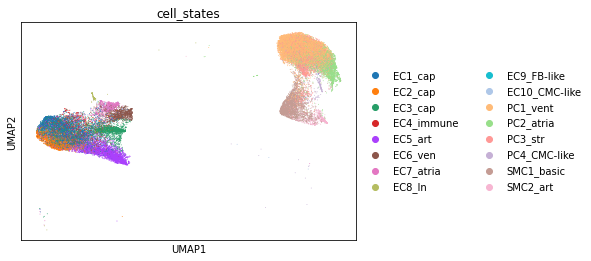

In [17]:
sc.pl.umap(ada, color='cell_states')

EC1/2/3_cap, capillary ECs; <br>
EC4_immune, immune-related ECs; <br>
EC5_art, arterial ECs; <br>
EC6_ven, venous ECs; <br>
EC7_atrial, atria-enriched ECs; <br>
EC8_ln, lymphatic ECs; <br>
EC9_FB-like, ECs with FB features; <br>
EC10_CM-like, ECs with cardiomyocyte features; <br>
PC1_vent, ventricle-enriched pericytes; <br>
PC2_atrial, atria-enriched pericytes; <br>
PC3_str, stromal pericytes; <br>
PC4_CM-like, pericytes with cardiomyocyte features; <br>
SMC1_basic, basic SMCs; <br>
SMC2_art, arterial SMCs <br>

In [7]:
sc.pp.subsample(ada, n_obs = 39000, random_state=0, copy = False)
ada

AnnData object with n_obs × n_vars = 39000 × 33538
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'nCount_RNA', 'nFeature_RNA'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_states_colors'
    obsm: 'X_pca', 'X_umap'

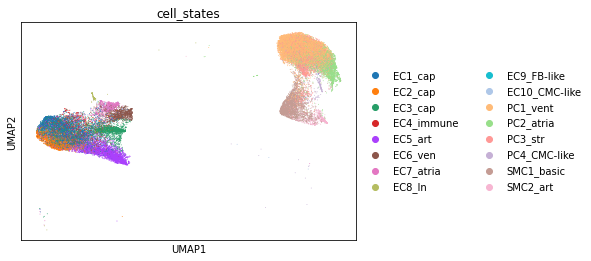

In [8]:
sc.pl.umap(ada, color='cell_states')

In [9]:
HVG_i = np.argsort(np.asarray(ada.var['vst.variance.standardized']))[-3000:]
ada = ada[:, HVG_i].copy()
ada

AnnData object with n_obs × n_vars = 39000 × 3000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'nCount_RNA', 'nFeature_RNA'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_states_colors'
    obsm: 'X_pca', 'X_umap'

'vst.variance.standardized' computed by Seurat

In [10]:
counts = scipy.sparse.csr_matrix.toarray(ada.raw[:, HVG_i].X)
counts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
data = scipy.sparse.csr_matrix.toarray(ada.X)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
counts.shape, data.shape

((39000, 3000), (39000, 3000))

In [13]:
ada.layers['raw'] = counts
ada.layers['log1p'] = data

In [14]:
ada.write('heart_vascular.h5ad')

In [15]:
ada

AnnData object with n_obs × n_vars = 39000 × 3000
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used', 'nCount_RNA', 'nFeature_RNA'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_states_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'raw', 'log1p'